<a href="https://colab.research.google.com/github/akhilesh146/ML-Models/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear** **Regression**

In [3]:
import numpy as np

In [2]:
class Linear_Regression() :

  #initiating the parameters
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    #number of training examples and number of features
    self.m, self.n = X.shape #no of rows and col

    #initiating weight and bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)

    #calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    #updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):
    return X.dot(self.w) + self.b


Using Linear data for Prediction

In [4]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Pre- Processing

In [5]:
# loading the data from the csv file to pandas dataframe
salary_data = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/salary_data.csv')

In [6]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
salary_data.shape

(30, 2)

In [9]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Spliting the features and target

In [10]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, -1].values

In [11]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Spliting the data into training data and testing data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Training the model

In [13]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=10000)

In [14]:
model.fit(X_train, Y_train)


In [15]:
# printing the parameter values (weight and bias)
print("weight:",model.w[0])
print("bias:",model.b)

weight: 9569.586885432896
bias: 24393.169151948117


Predict the salary value for the test data

In [16]:
test_data_prediction = model.predict(X_test)

In [17]:
print(test_data_prediction)

[36833.63210301 34919.71472592 67456.3101364  59800.64062805
 92337.23603852 81810.69046455]


visualizing the predicted values and actual values

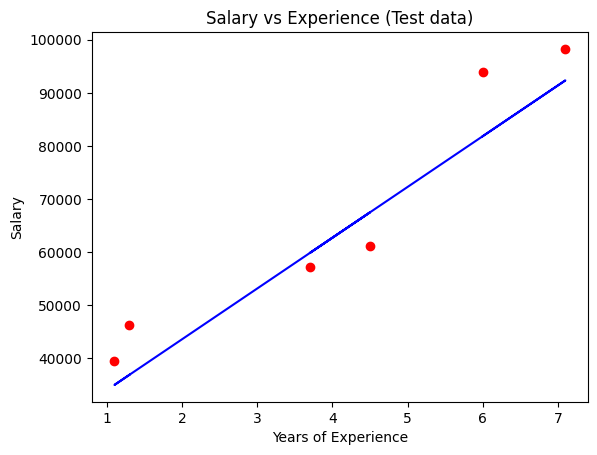

In [18]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.title('Salary vs Experience (Test data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()